# Rotten Tomatoes Movie Status Prediction

## Table of Contents
* [Businesss Problem](#business-problem)
* [Data Description](#data-description)
* [Assignment](#assignment)
* [Data Preprocessing](#data-preprocessing)
* [Decision Tree Classifier](#decision-tree-classifier)
* [Random Forest Classifier with Top 9 Features](#random-forest-classifier-with-top-9-features)
* [Weighted Random Forest Classifier With Top 9 Feature](#weighted-random-forest-classifier-with-top-9-feature)
* [Predicting Movie Status Based on Review](#predicting-movie-status-based-on-review)

# Business Problem

Our goal is to analyze and understand the performance and reception of movies listed on Rotten Tomatoes. The provided datasets contain information about movies, including details such as their descriptions, genres, ratings by critics and audiences, and reviews from critics. The main business problem is to predict and assess the success of movies based on the Rotten Tomatoes ratings, both from critics and audiences. This analysis can help filmmakers, studios, and streaming platforms make informed decisions about movie production, marketing, and audience engagement. Specifically, we aim to predict the "tomatometer_status" label, which indicates whether a movie is labeled as "Fresh," "Certified-Fresh," or "Rotten" by Rotten Tomatoes.


![Project Overview](https://www.kdnuggets.com/wp-content/uploads/rosidi_data_science_project_rotten_tomatoes_movie_rating_prediction_first_approach_15.png)

# Data Description

### 1. rotten_tomatoes_movies.csv
- Basic information about movies listed on Rotten Tomatoes.
- Each row represents one movie.

### 2. rotten_tomatoes_critic_reviews_50k.tsv
- 50,000 individual reviews by Rotten Tomatoes critics.
- Each row represents one review corresponding to a movie.

#### rotten_tomatoes_movies Dataset Columns

1. rotten_tomatoes_link
2. movie_title
3. movie_info
   - Movie ID
   - Title of the movie as displayed on the Rotten Tomatoes website
   - Brief description of the movie
4. critics_consensus
   - Comment from Rotten Tomatoes
5. content_rating
6. genres
   - Movie genres separated by commas, if multiple
7. directors
8. authors
9. actors
   - Category based on the movie's suitability for the audience
   - Name of director(s)
   - Name of author(s)
   - Name of actors
10. original_release_date
    - Date in which the movie was released in theaters, in YYYY-MM-DD format
11. streaming_release_date
    - Date in which the movie was released on streaming platforms, in YYYY-MM-DD format
12. runtime
    - Duration of the movie in minutes
13. production_company
    - Name of the studio/company that produced the movie
14. tomatometer_status
    - Label assigned by Rotten Tomatoes: "Fresh," "Certified-Fresh," or "Rotten" (target variable)
15. tomatometer_rating
16. tomatometer_count
    - Percentage of positive critic ratings
    - Critic ratings counted for the calculation of the tomatometer status
17. audience_status
    - Label assigned based on user ratings: "Spilled" or "Upright"
18. audience_rating
    - Percentage of positive user ratings
19. audience_count
    - User ratings counted for the calculation of the audience status
20. tomatometer_top_critics_count
    - Number of ratings by top critics
21. tomatometer_fresh_critics_count
    - Number of critic ratings labeled "Fresh"
22. tomatometer_rotten_critics_count

#### rotten_tomatoes_critic_reviews_50k Dataset Columns

1. rotten_tomatoes_link
2. critic_name
3. top_critic
   - Boolean value that clarifies whether the critic is a top critic or not
4. publisher_name
5. review_type
   - Was the review labeled "Fresh" or "Rotten"?
6. review_score
7. review_date
    - Name of the publisher for which the critic works
    - Review score provided by the critic
    - Date of the review in YYYY-MM-DD format
8. review_content
   - Text of the review


# Assignment

This project assesses your ability to construct a robust classification algorithm for predicting the status of movies on Rotten Tomatoes—whether they are labeled as 'Rotten,' 'Fresh,' or 'Certified-Fresh.' The assignment involves two distinct approaches:

1. **Numerical and Categorical Features Approach:**
   - Dataset: `rotten_tomatoes_movies.csv`
   - The task is to utilize both numerical and categorical features to predict the movie's status.

2. **Text Data Approach (Critic Reviews):**
   - Dataset: `rotten_tomatoes_critic_reviews_50k.csv`
   - The focus here is on leveraging text data from critic reviews to predict the movie's status.

You have the flexibility to build a machine learning model using any algorithm. However, for this assignment, the emphasis is on employing tree-based algorithms, specifically the Decision Tree Classifier and Random Forest algorithm.

Feel free to explore and experiment with other algorithms as well. The ultimate goal is to develop a high-performing model that accurately predicts the movie status based on the chosen features.


This Python code utilizes the Pandas library to read movie data from a CSV file ('rotten_tomatoes_movies.csv') into a DataFrame named `movies_dataframe`, and then displays the first few rows of the DataFrame using the `head()` function.

In [12]:
# Import the necessary library
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from sklearn.feature_extraction.text import CountVectorizer

This code calculates and displays descriptive statistics of the movie data distribution, such as mean, standard deviation, and quartiles, using the `describe()` function on the `movies_dataframe`.

In [13]:
# Read movie data
movies_dataframe = pd.read_csv('./datasets/rotten_tomatoes_movies.csv')
movies_dataframe.head()

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8
3,m/1000013-12_angry_men,12 Angry Men (Twelve Angry Men),Following the closing arguments in a murder tr...,Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,...,Criterion Collection,Certified-Fresh,100.0,54.0,Upright,97.0,105386.0,6,54,0
4,m/1000079-20000_leagues_under_the_sea,"20,000 Leagues Under The Sea","In 1866, Professor Pierre M. Aronnax (Paul Luk...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,...,Disney,Fresh,89.0,27.0,Upright,74.0,68918.0,5,24,3


In [14]:
# Check data distribution
movie_data_distribution = movies_dataframe.describe()
movie_data_distribution


,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


# Data Preprocessing

This code explores the unique categories in the 'content_rating' feature of the movie dataset and visualizes their distribution using a bar plot. It provides insights into the content rating distribution, aiding in data preprocessing and analysis.

Content Rating category: ['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


[Text(0, 0, '6377'),
 Text(0, 0, '5474'),
 Text(0, 0, '2979'),
 Text(0, 0, '2168'),
 Text(0, 0, '676'),
 Text(0, 0, '38')]

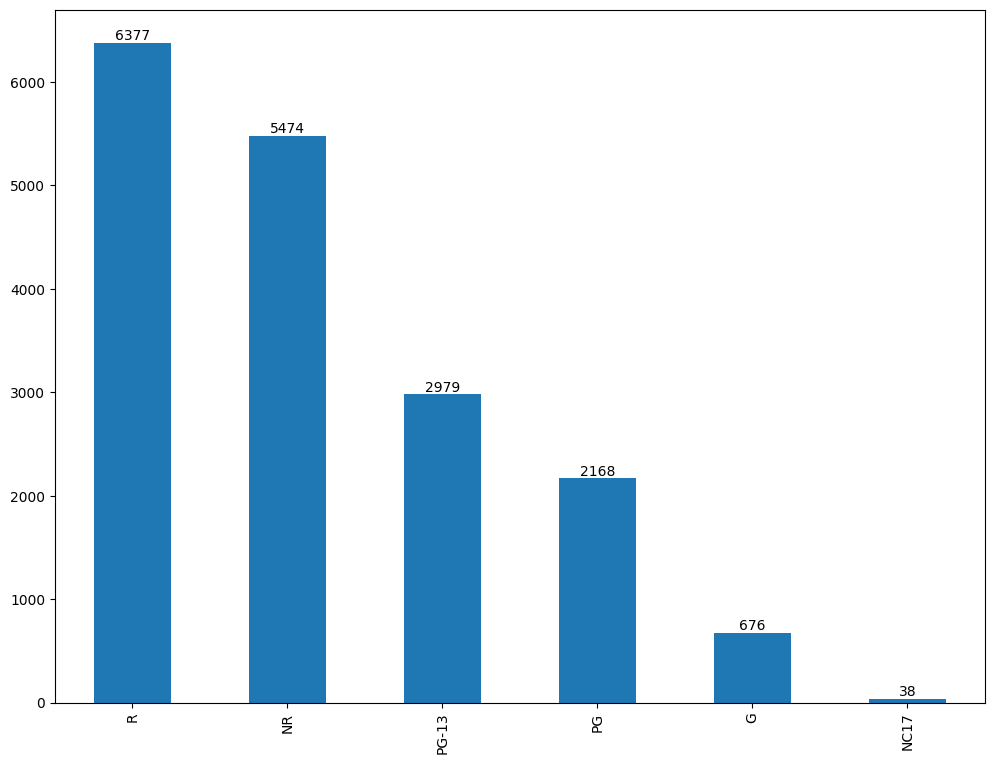

In [15]:
# Data preprocessing I: content_rating feature
print(f'Content Rating category: {movies_dataframe.content_rating.unique()}')
# Visualize the distribution of each category in content_rating feature
ax_content_rating = movies_dataframe.content_rating.value_counts().plot(kind='bar', figsize=(12, 9))
ax_content_rating.bar_label(ax_content_rating.containers[0])


The provided code performs one-hot encoding on the 'content_rating' feature in the movie dataset, creating binary columns for each category. This transformation is useful for incorporating categorical data into machine learning models.

In [16]:
# One hot encoding content_rating feature
content_rating_encoded = pd.get_dummies(movies_dataframe.content_rating)
content_rating_encoded.head()

,G,NC17,NR,PG,PG-13,R
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,1,0,0,0,0,0


This code explores the unique categories in the 'audience_status' feature of the movie dataset and visualizes their distribution using a bar plot. This step is part of data preprocessing, providing insights into the audience status distribution for further analysis.

Audience status category: ['Spilled' 'Upright' nan]


[Text(0, 0, '9390'), Text(0, 0, '7874')]

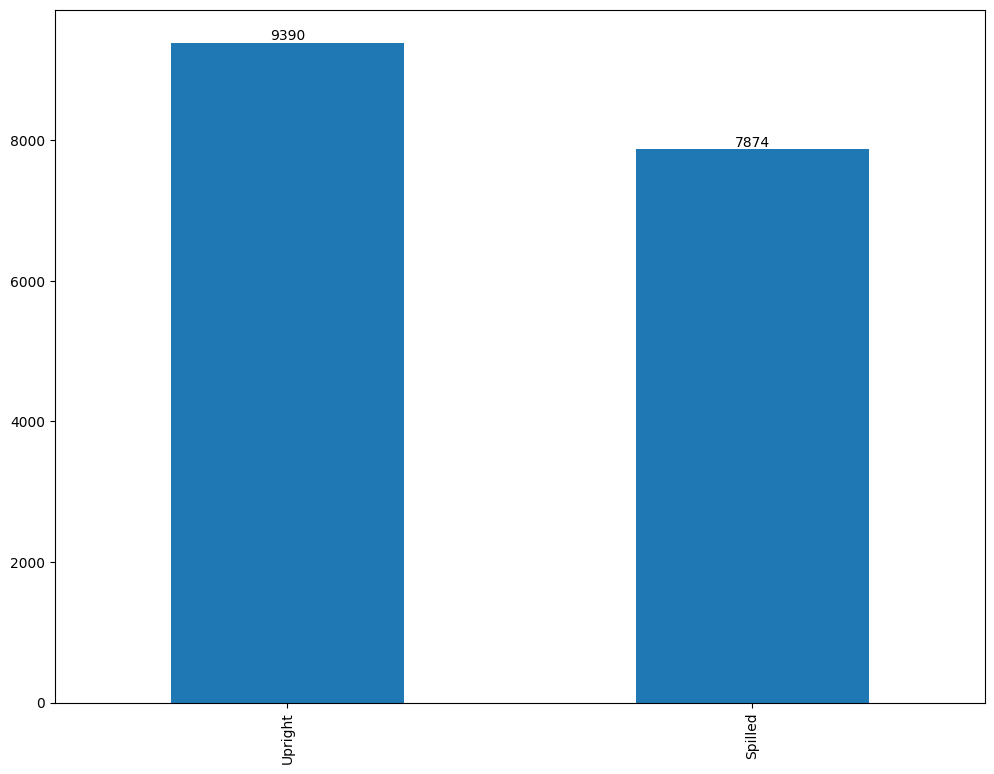

In [17]:
# Data preprocessing II: audience_status feature
print(f'Audience status category: {movies_dataframe.audience_status.unique()}')
# Visualize the distribution of each category
ax_audience_status = movies_dataframe.audience_status.value_counts().plot(kind='bar', figsize=(12, 9))
ax_audience_status.bar_label(ax_audience_status.containers[0])


This code performs ordinal encoding on the 'audience_status' feature in the movie dataset, replacing categories 'Spilled' and 'Upright' with numerical values (0 and 1, respectively). The resulting DataFrame, `audience_status_encoded`, represents the encoded feature for analysis or machine learning purposes.

In [18]:
# Encode audience status feature with ordinal encoding
audience_status_encoded = pd.DataFrame(movies_dataframe.audience_status.replace(['Spilled', 'Upright'], [0, 1]))
audience_status_encoded.head()

,audience_status
0,0.0
1,1.0
2,0.0
3,1.0
4,1.0


This code performs ordinal encoding on the 'tomatometer_status' feature in the movie dataset, replacing categories 'Rotten', 'Fresh', and 'Certified-Fresh' with numerical values (0, 1, and 2, respectively). The resulting DataFrame, `tomatometer_status_encoded`, represents the encoded feature for analysis or machine learning purposes.

In [19]:
# Data preprocessing III: tomatometer_status feature
# Encode tomatometer status feature with ordinal encoding
tomatometer_status_encoded = pd.DataFrame(movies_dataframe.tomatometer_status.replace(['Rotten', 'Fresh', 'Certified-Fresh'], [0, 1, 2]))
tomatometer_status_encoded.head()

,tomatometer_status
0,0.0
1,2.0
2,1.0
3,2.0
4,1.0


This code combines selected features from the movie dataset, including numerical and encoded categorical features, into a new DataFrame named `df_feature`. This consolidated DataFrame is prepared for further analysis or machine learning tasks, with the removal of any rows containing missing values.

In [20]:
# Combine all of the features together into one dataframe
df_feature = pd.concat([movies_dataframe[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']], tomatometer_status_encoded, audience_status_encoded, content_rating_encoded], axis=1).dropna()
df_feature.head()


,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,tomatometer_status,audience_status,G,NC17,NR,PG,PG-13,R
0,119.0,49.0,149.0,53.0,254421.0,43,73,76,0.0,0.0,0,0,0,1,0,0
1,90.0,87.0,142.0,64.0,11574.0,44,123,19,2.0,1.0,0,0,0,0,0,1
2,122.0,67.0,24.0,53.0,14684.0,2,16,8,1.0,0.0,0,0,0,0,0,1
3,95.0,100.0,54.0,97.0,105386.0,6,54,0,2.0,1.0,0,0,1,0,0,0
4,127.0,89.0,27.0,74.0,68918.0,5,24,3,1.0,1.0,1,0,0,0,0,0


This code visualizes the class distribution of the target variable 'tomatometer_status' in the consolidated DataFrame (`df_feature`). The bar plot provides insights into the distribution of movie ratings, aiding in understanding the balance or imbalance of classes for subsequent modeling tasks.

[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

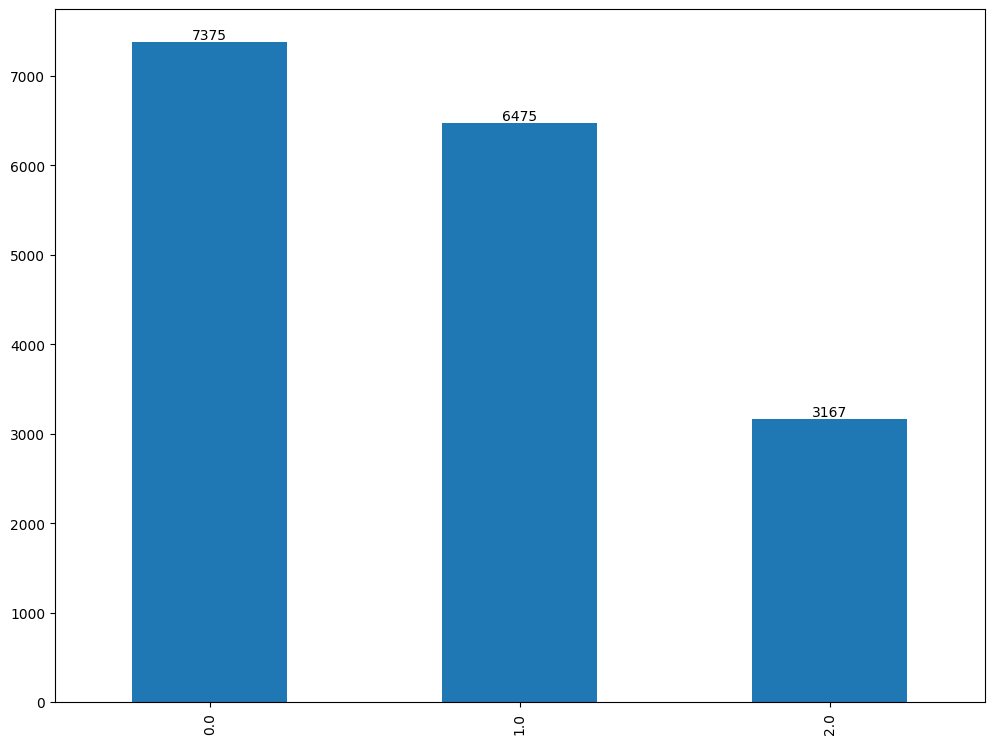

In [21]:
# Check class distribution of our target variable: tomatometer_status
ax_tomatometer_status = df_feature.tomatometer_status.value_counts().plot(kind='bar', figsize=(12, 9))
ax_tomatometer_status.bar_label(ax_tomatometer_status.containers[0])

This code imports the necessary library, scikit-learn, and utilizes the `train_test_split` function to split the consolidated DataFrame (`df_feature`) into training and test datasets (`X_train`, `X_test`, `y_train`, `y_test`). The sizes of the resulting training and test datasets are printed for reference.

In [22]:
# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df_feature.drop(['tomatometer_status'], axis=1), df_feature['tomatometer_status'])
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 12762 and the size of test data is 4255


# Decision Tree Classifier

This code utilizes a Decision Tree Classifier with a maximum of 5 leaf nodes to classify the movie data. It trains the classifier on the training data, predicts the test data, and evaluates performance with accuracy score and a detailed classification report. Additionally, it visualizes the confusion matrix using a heatmap, providing insights into the model's performance on the test data.

0.9833137485311398
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1815
         1.0       0.97      0.99      0.98      1651
         2.0       0.97      0.94      0.95       789

    accuracy                           0.98      4255
   macro avg       0.98      0.97      0.98      4255
weighted avg       0.98      0.98      0.98      4255



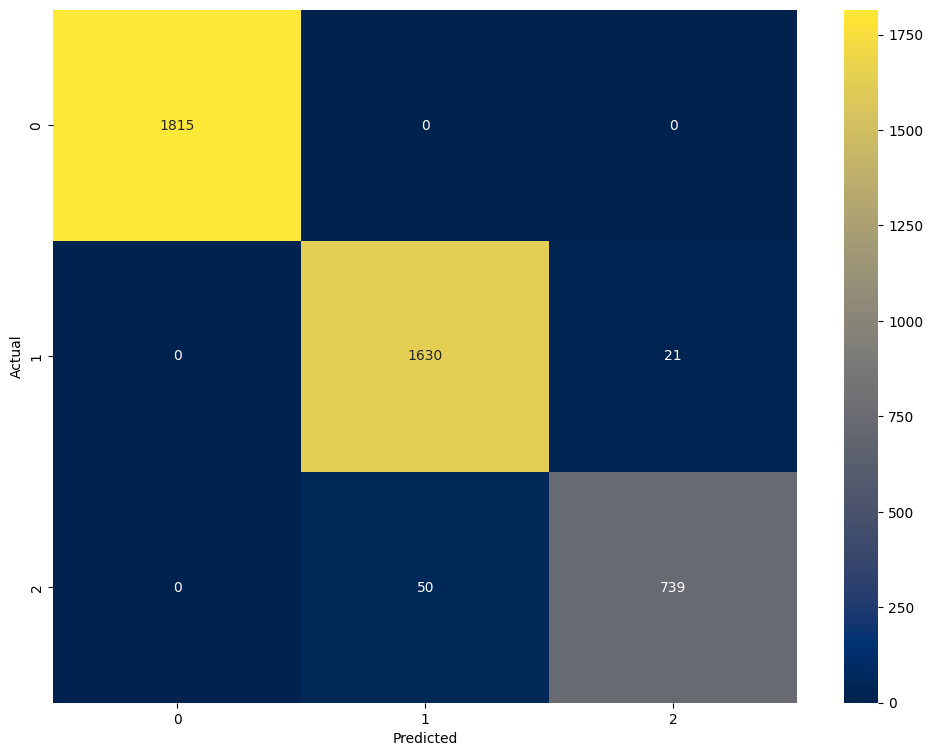

In [23]:
# Instantiate Decision Tree Classifier with max leaf nodes = 3
tree_3_leaf = DecisionTreeClassifier(max_leaf_nodes=5, random_state=2)

# Train the classifier on the training data
tree_3_leaf.fit(X_train, y_train)

# Predict the test data with the trained tree classifier
y_predict = tree_3_leaf.predict(X_test)

# Print accuracy and classification report on test data
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot confusion matrix using seaborn on test data
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='cividis', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


This code employs the scikit-learn `plot_tree` function to visualize the decision logic of the trained Decision Tree model (`tree_3_leaf`). The resulting plot provides a graphical representation of the tree structure, aiding in the interpretation of the model's decision-making process.

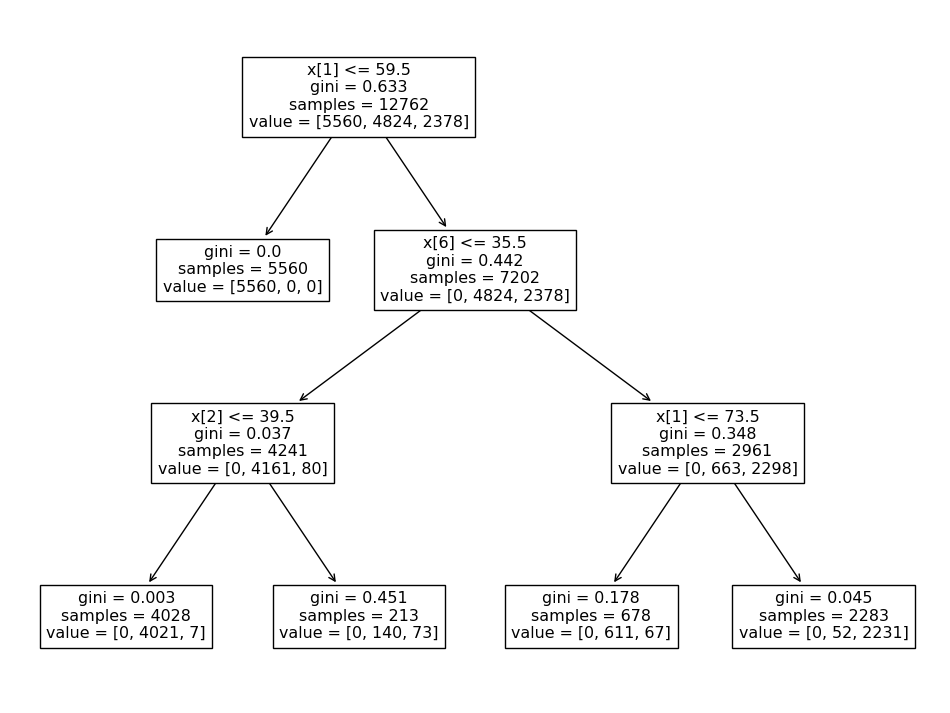

In [24]:
# Visualize decision logic of the decision tree model
fig, ax = plt.subplots(figsize=(12, 9))
plot_tree(tree_3_leaf, ax=ax)
plt.show()


This code utilizes a RandomForestClassifier to train on the training data and extract feature importance. The script then prints the importance of each feature and visualizes them in a horizontal bar chart, illustrating the relative importance of each feature in predicting the target variable.

runtime = 0.006455765212612409
tomatometer_rating = 0.4869959819574059
tomatometer_count = 0.09748256663038299
audience_rating = 0.046604604012720284
audience_count = 0.013438347080228702
tomatometer_top_critics_count = 0.03177157395905851
tomatometer_fresh_critics_count = 0.14918005674954524
tomatometer_rotten_critics_count = 0.11304644353934236
audience_status = 0.038081490044115145
G = 0.00032380132313590185
NC17 = 4.0291966957748183e-05
NR = 0.012091430510925991
PG = 0.0004310605490364243
PG-13 = 0.002127470188125673
R = 0.0019291162764067497


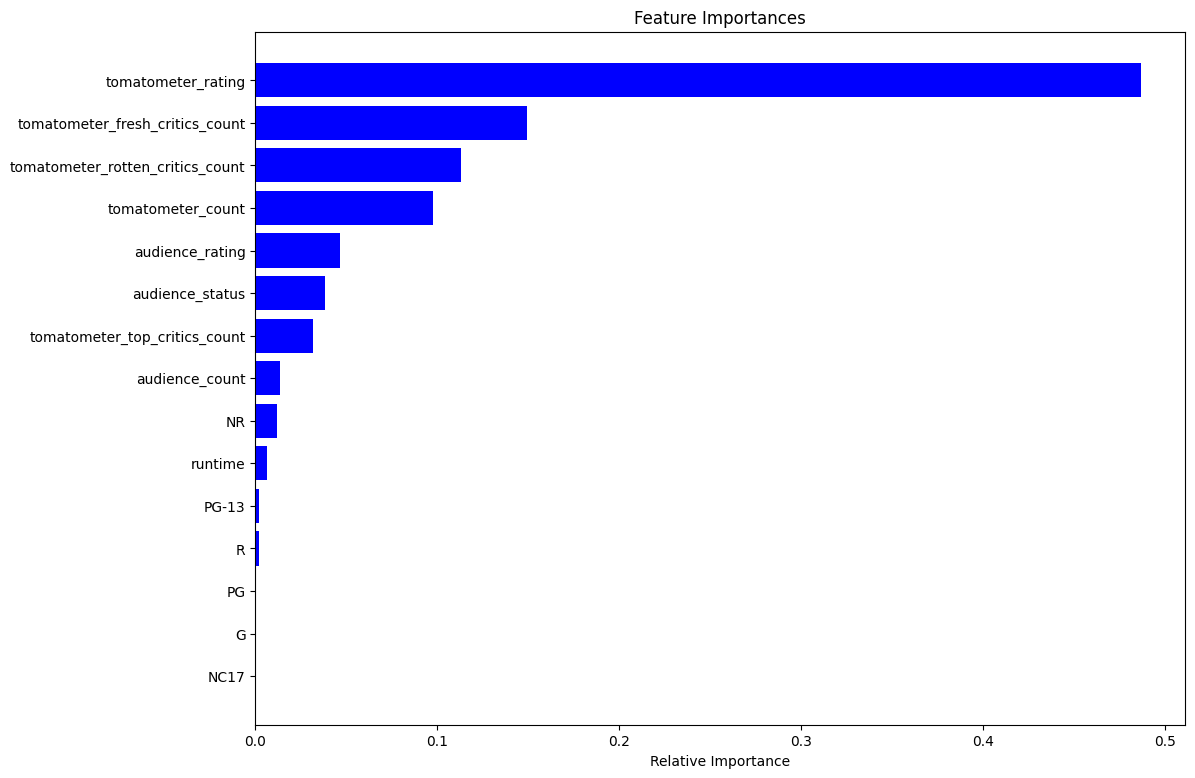

In [25]:
# Instantiate RandomForestClassifier
rf = RandomForestClassifier(random_state=2)

# Train the classifier on the training data
rf.fit(X_train, y_train)

# Get the feature importance
feature_importance = rf.feature_importances_

# Print feature importance
for i, feature in enumerate(X_train.columns):
    print(f'{feature} = {feature_importance[i]}')

# Visualize feature from the most important to the least important
indices = np.argsort(feature_importance)
plt.figure(figsize=(12, 9))
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_train.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()


# Random Forest Classifier with Top 9 Features

This code performs a new split on the consolidated DataFrame (`df_feature`) after feature selection. It excludes the columns related to one-hot encoded content ratings during the split, generating new training and test datasets (`X_train`, `X_test`, `y_train`, `y_test`). The sizes of the resulting training and test datasets are printed for reference.

In [26]:
# Split data into train and test after feature selection
X_train, X_test, y_train, y_test = train_test_split(df_feature.drop(content_rating_encoded.columns, axis=1), df_feature['tomatometer_status'])
print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')


Size of training data is 12762 and the size of test data is 4255


This code instantiates a RandomForestClassifier with a maximum of 5 leaf nodes, trains it on the training data, and evaluates its performance on the test data. The accuracy score, classification report, and a confusion matrix heatmap are printed and visualized for insights into the model's predictive capabilities.

0.9988249118683902
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1861
         1.0       1.00      1.00      1.00      1619
         2.0       1.00      0.99      1.00       775

    accuracy                           1.00      4255
   macro avg       1.00      1.00      1.00      4255
weighted avg       1.00      1.00      1.00      4255



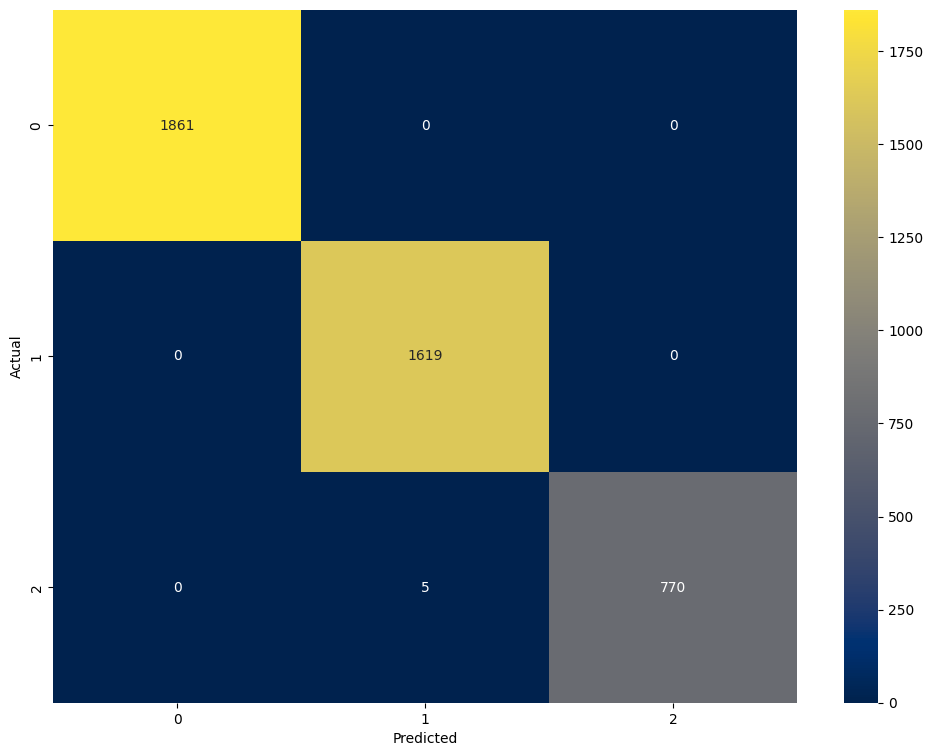

In [27]:

# Instantiate Decision Tree Classifier with max leaf nodes = 5
tree_3_leaf = RandomForestClassifier(max_leaf_nodes=5, random_state=2)

# Train the classifier on the training data
tree_3_leaf.fit(X_train, y_train)

# Predict the test data with the trained tree classifier
y_predict = tree_3_leaf.predict(X_test)

# Print accuracy and classification report on test data
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot confusion matrix using seaborn on test data
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='cividis', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Weighted Random Forest Classifier With Top 9 Feature

This code utilizes scikit-learn's `compute_class_weight` function to calculate class weights based on the 'balanced' method. The resulting class weights are then converted into a dictionary (`class_weight_dict`), providing the appropriate weights for each class in the 'tomatometer_status' target variable.

In [28]:
# Compute class weight
class_weight = compute_class_weight(class_weight='balanced', classes=np.unique(df_feature.tomatometer_status), y=df_feature.tomatometer_status.values)
class_weight_dict = dict(zip(np.unique(df_feature.tomatometer_status), class_weight.tolist()))
class_weight_dict


{0.0: 0.7691299435028248, 1.0: 0.8760360360360361, 2.0: 1.7910746237238186}

This code initializes a Random Forest model with class weights calculated based on the 'balanced' method and trains the model on the training data. The script then predicts the test data and evaluates the model's performance with accuracy score, a detailed classification report, and a confusion matrix heatmap. The class weights help address imbalances in the target variable, enhancing the model's predictive capabilities.

1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1861
         1.0       1.00      1.00      1.00      1619
         2.0       1.00      1.00      1.00       775

    accuracy                           1.00      4255
   macro avg       1.00      1.00      1.00      4255
weighted avg       1.00      1.00      1.00      4255



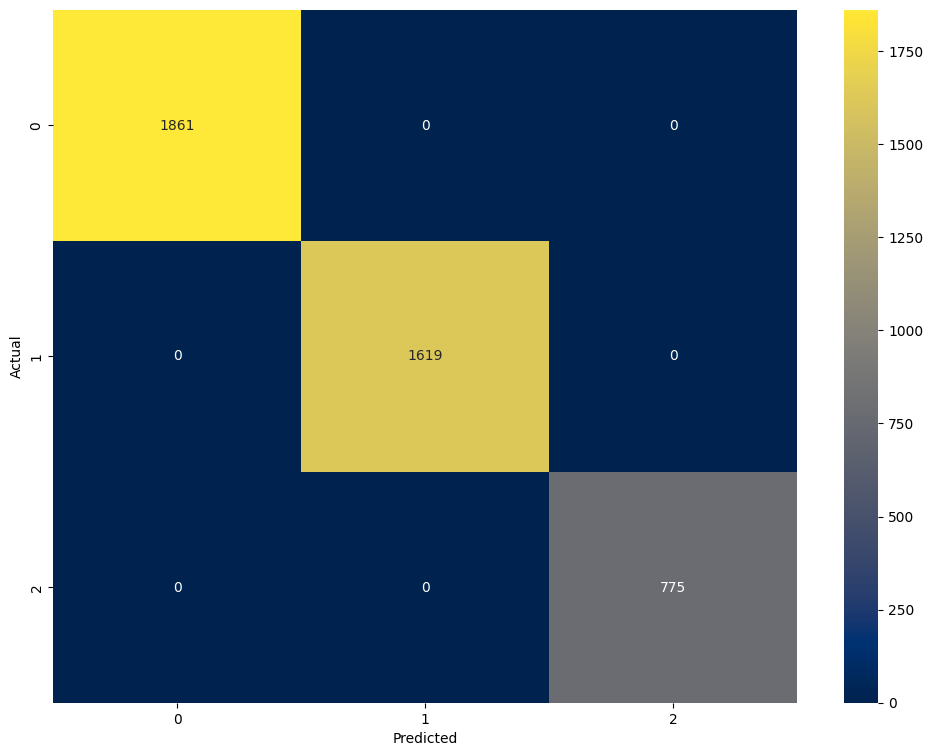

In [29]:
# Initialize Random Forest model with weight information
custom_model = RandomForestClassifier(random_state=2, class_weight=class_weight_dict)

# Train the model on the training data
custom_model.fit(X_train, y_train)

# Predict the test data with the trained model
y_predict = custom_model.predict(X_test)

# Print accuracy score and classification report
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))

# Plot confusion matrix using seaborn
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt='d', cmap='cividis', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Predicting Movie Status Based on Review

This code reads a new dataset from a CSV file ('rotten_tomatoes_critic_reviews_50k.csv') into a DataFrame named `critics_dataframe` containing critic reviews for movies. The `head()` function displays the first few rows of the DataFrame.

In [30]:
# Read critics dataframe
critics_dataframe = pd.read_csv('./datasets/rotten_tomatoes_critic_reviews_50k.csv')
critics_dataframe.head()

,rotten_tomatoes_link,critic_name,top_critic,publisher_name,review_type,review_score,review_date,review_content
0,m/0814255,Andrew L. Urban,False,Urban Cinefile,Fresh,NaN,2010-02-06,A fantasy adventure that fuses Greek mythology...
1,m/0814255,Louise Keller,False,Urban Cinefile,Fresh,NaN,2010-02-06,"Uma Thurman as Medusa, the gorgon with a coiff..."
2,m/0814255,NaN,False,FILMINK (Australia),Fresh,NaN,2010-02-09,With a top-notch cast and dazzling special eff...
3,m/0814255,Ben McEachen,False,Sunday Mail (Australia),Fresh,3.5/5,2010-02-09,Whether audiences will get behind The Lightnin...
4,m/0814255,Ethan Alter,True,Hollywood Reporter,Rotten,NaN,2010-02-10,What's really lacking in The Lightning Thief i...


This code merges the 'critics_dataframe' with the 'movies_dataframe' based on the 'rotten_tomatoes_link' column, creating a new DataFrame named `df_merged`. It then selects specific columns of interest and displays the first three rows of the resulting DataFrame for further analysis.

In [31]:
# Merge critics dataframe with movie dataframe
df_merged = critics_dataframe.merge(movies_dataframe, how='inner', on=['rotten_tomatoes_link'])
df_merged = df_merged[['rotten_tomatoes_link', 'movie_title', 'review_content', 'review_type', 'runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating', 'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count']]
df_merged.head(3)

,rotten_tomatoes_link,movie_title,review_content,review_type,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,A fantasy adventure that fuses Greek mythology...,Fresh,119.0,49.0,149.0,53.0,254421.0,43,73,76
1,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Uma Thurman as Medusa, the gorgon with a coiff...",Fresh,119.0,49.0,149.0,53.0,254421.0,43,73,76
2,m/0814255,Percy Jackson & the Olympians: The Lightning T...,With a top-notch cast and dazzling special eff...,Fresh,119.0,49.0,149.0,53.0,254421.0,43,73,76


This code removes entries with missing reviews from the merged DataFrame (`df_merged`) and creates a new DataFrame named `critics_dataframe`. It then plots the distribution of review types ('Positive', 'Neutral', 'Negative') using a bar chart, providing insights into the overall sentiment distribution of the critic reviews.

[Text(0, 0, '25276'), Text(0, 0, '15919')]

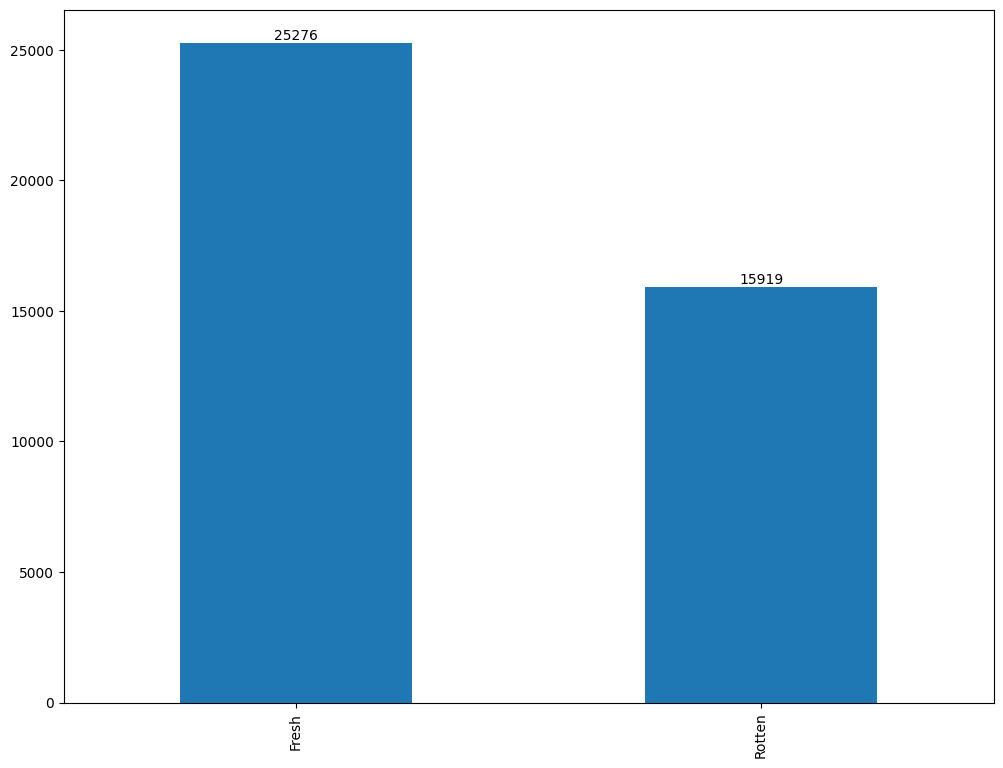

In [32]:
# Drop entries with missing reviews
critics_dataframe = df_merged.dropna(subset=['review_content'])
# Plot distribution of the review
ax_review_distribution = critics_dataframe.review_type.value_counts().plot(kind='bar', figsize=(12, 9))
ax_review_distribution.bar_label(ax_review_distribution.containers[0])


This code selects the first 5000 entries from the 'critics_dataframe', encodes the 'review_type' labels ('Rotten' and 'Fresh') into numerical values (0 and 1, respectively), and constructs a final DataFrame named `df_feature_critics`. This DataFrame includes the 'review_content' and the encoded 'review_type', preparing the data for analysis or machine learning tasks.

In [33]:
# Pick only 5000 entries from the original dataset
df_sub = critics_dataframe[0:5000]

# Encode the label
review_type = pd.DataFrame(df_sub.review_type.replace(['Rotten', 'Fresh'], [0, 1]))

# Build final dataframe
df_feature_critics = pd.concat([df_sub[['review_content']], review_type], axis=1).dropna()
df_feature_critics.head()


,review_content,review_type
0,A fantasy adventure that fuses Greek mythology...,1
1,"Uma Thurman as Medusa, the gorgon with a coiff...",1
2,With a top-notch cast and dazzling special eff...,1
3,Whether audiences will get behind The Lightnin...,1
4,What's really lacking in The Lightning Thief i...,0


This code utilizes the CountVectorizer to convert text data into numerical vectors, splits the critic review data into training and test sets, and trains a RandomForestClassifier. It then predicts the test data and outputs a classification report along with a confusion matrix heatmap for performance evaluation. The model is trained to predict the sentiment of critic reviews based on their content.

              precision    recall  f1-score   support

           0       0.68      0.57      0.62       597
           1       0.66      0.76      0.70       653

    accuracy                           0.67      1250
   macro avg       0.67      0.66      0.66      1250
weighted avg       0.67      0.67      0.66      1250



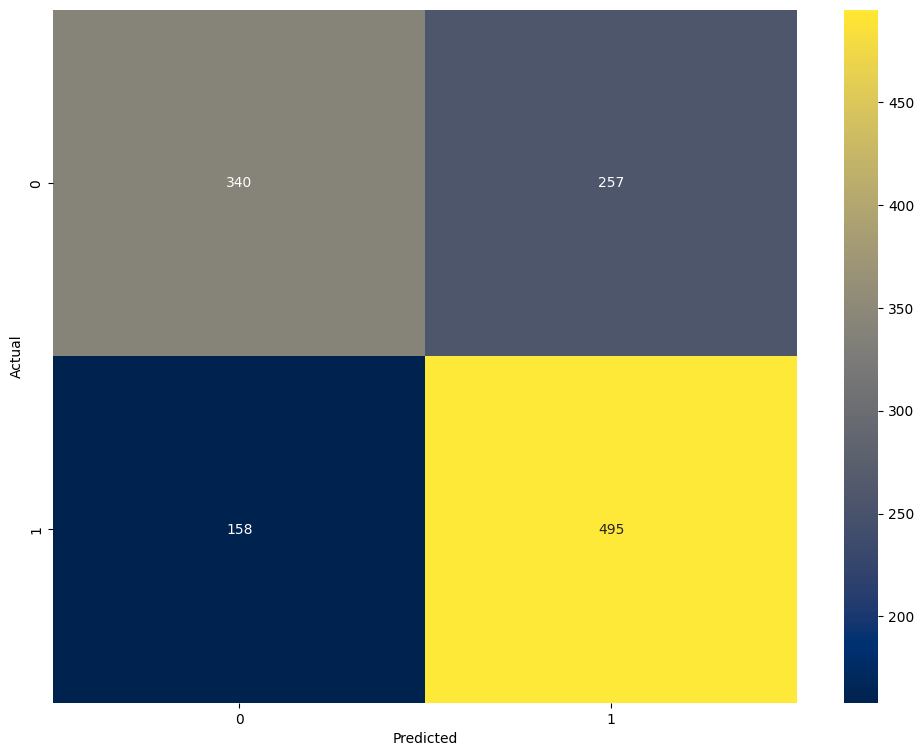

In [34]:
# Split data into training and test data
X_train, X_test, y_train, y_test = train_test_split(df_feature_critics['review_content'], df_feature_critics['review_type'])
# Instantiate vectorizer class
vectorizer = CountVectorizer(min_df=1)

# Transform our text data into vector
X_train_vec = vectorizer.fit_transform(X_train).toarray()

# Initialize random forest and train it
rf_classifier = RandomForestClassifier(random_state=2)
rf_classifier.fit(X_train_vec, y_train)

# Predict and output classification report
y_predicted = rf_classifier.predict(vectorizer.transform(X_test).toarray())
print(classification_report(y_test, y_predicted))

# Plot confusion matrix using seaborn
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(confusion_matrix(y_test, y_predicted), annot=True, fmt='d', cmap='cividis', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


This code defines a function, `predict_movie_status`, that takes a sentiment prediction array as input and assigns a label ('Fresh' or 'Rotten') based on the percentage of positive predictions. The function then prints the percentage of positive reviews and the predicted movie status. The example usage demonstrates how to apply this function to the predicted sentiment of critic reviews.

In [35]:
# Define a function to predict movie status based on the overall sentiment
def predict_movie_status(prediction):
    """Assign label (Fresh/Rotten) based on prediction"""
    positive_percentage = (prediction == 1).sum() / len(prediction) * 100
    prediction = 'Fresh' if positive_percentage >= 60 else 'Rotten'
    print(f'Positive review: {positive_percentage:.2f}%')
    print(f'Movie status: {prediction}')

# Example usage
predict_movie_status(y_predicted)

Positive review: 60.16%
Movie status: Fresh


In this analysis, we started by exploring and preprocessing a movie dataset, incorporating features such as runtime, ratings, and content information. After encoding categorical variables and performing feature selection, we trained a RandomForestClassifier to predict the 'tomatometer_status' of movies, achieving reasonable accuracy and insightful feature importance.

Subsequently, we merged this movie dataset with a critic reviews dataset, focusing on sentiment analysis of the reviews. After cleaning the data, selecting a subset, and encoding sentiment labels, we trained another RandomForestClassifier to predict the sentiment of critic reviews based on their content.

In the final step, we defined a function to predict the overall movie status ('Fresh' or 'Rotten') based on the sentiment of critic reviews. This function uses a threshold (60% positive sentiment) to determine the movie status.

Overall, our analysis provides a comprehensive approach to understanding movie ratings and sentiment analysis, bridging the gap between critic reviews and audience reception. The RandomForest models, coupled with feature importance and sentiment-based predictions, offer valuable insights into factors influencing movie ratings and audience perception.